<a href="https://colab.research.google.com/github/adityanarayan794/TFpublic/blob/master/cifar10_con2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense

In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [126]:
cifar10 = keras.datasets.cifar10
(train_x , train_y) , (test_x, test_y) = cifar10.load_data()
train_x.shape , test_x.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [0]:
#normalize

train_x = train_x / 255.0
test_x = test_x / 255.0

train_ds =  tf.data.Dataset.from_tensor_slices((train_x ,train_y)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((test_x , test_y)).shuffle(10000).batch(32)

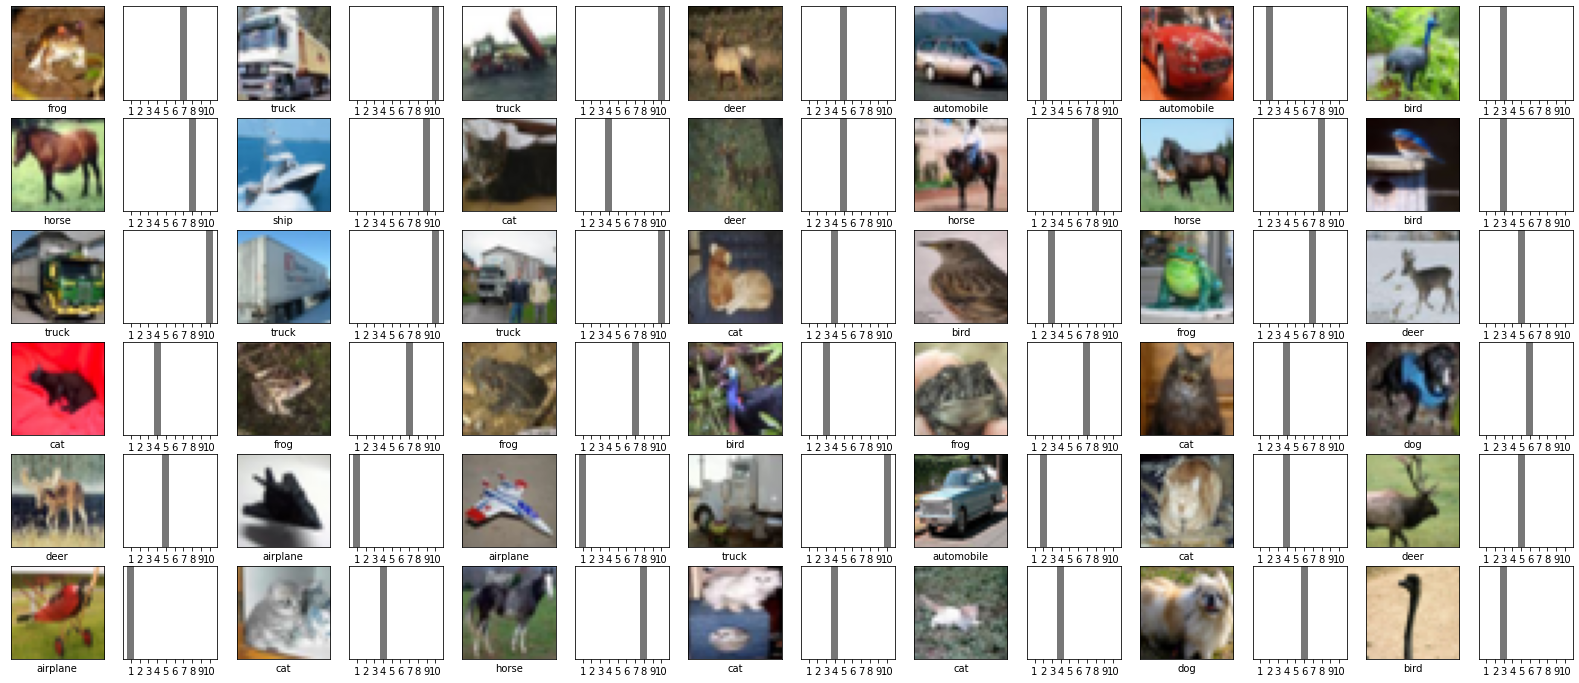

In [129]:
#plot 
num_row =  6
num_col = 7
plt.figure(figsize=(2*2*num_col,2*num_row))
for i in range(num_col*num_row):
  plt.subplot(num_row,2*num_col,2*i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_x[i])
  plt.xlabel('{}'.format(class_names[np.max(train_y[i])]))

  values = [0]*10
  values[np.max(train_y[i])]=1
  plt.subplot(num_row,2*num_col,2*i+2)
  plt.xticks(range(1,11))
  plt.yticks([])
  plt.grid(False)
  plt.bar(range(1,11),values,color='#777777')
  plt.ylim([0,1])


plt.show()

In [0]:
#model

model = keras.Sequential([
                          Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
                          Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
                          MaxPool2D(pool_size=2, strides=2, padding='valid'),
                          Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
                          MaxPool2D(pool_size=2, strides=2, padding='valid'),
                          Flatten(),
                          Dense(units=128, activation='relu'), 
                          Dense(units=128, activation='relu'),   
                          Dense(units=10, activation='softmax')                         
])


In [0]:
model.compile(optimizer= 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['sparse_categorical_crossentropy','accuracy','sparse_categorical_accuracy'])


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [150]:
model.fit(train_x, train_y, epochs=10,batch_size= 32)

Epoch 1/10
1563/1563 [==============================] - 180s 115ms/step - loss: 1.2981 - sparse_categorical_crossentropy: 1.2982 - accuracy: 0.5323 - sparse_categorical_accuracy: 0.5323
Epoch 2/10
1563/1563 [==============================] - 183s 117ms/step - loss: 0.8868 - sparse_categorical_crossentropy: 0.8869 - accuracy: 0.6882 - sparse_categorical_accuracy: 0.6882
Epoch 3/10
1563/1563 [==============================] - 192s 123ms/step - loss: 0.7263 - sparse_categorical_crossentropy: 0.7261 - accuracy: 0.7442 - sparse_categorical_accuracy: 0.7442
Epoch 4/10
1563/1563 [==============================] - 181s 116ms/step - loss: 0.6019 - sparse_categorical_crossentropy: 0.6020 - accuracy: 0.7875 - sparse_categorical_accuracy: 0.7875
Epoch 5/10
1563/1563 [==============================] - 181s 116ms/step - loss: 0.5095 - sparse_categorical_crossentropy: 0.5093 - accuracy: 0.8199 - sparse_categorical_accuracy: 0.8199
Epoch 6/10
1563/1563 [==============================] - 182s 117ms/ste

In [151]:
  test_loss , test_categorical_entropy ,test_accuracy ,test_categorical_accuracy = model.evaluate(test_x , test_y , verbose=2)
print(test_accuracy)

313/313 - 9s - loss: 1.2688 - sparse_categorical_crossentropy: 1.2671 - accuracy: 0.7176 - sparse_categorical_accuracy: 0.7176
0.7175999879837036


In [0]:
predictions= model.predict(test_x)

In [153]:
print(predictions[0])

[4.0473532e-07 2.3593392e-09 1.8599172e-06 9.9182546e-01 5.8361888e-10
 7.8822505e-03 2.8972686e-04 1.3845214e-08 2.5059200e-07 6.5249273e-09]


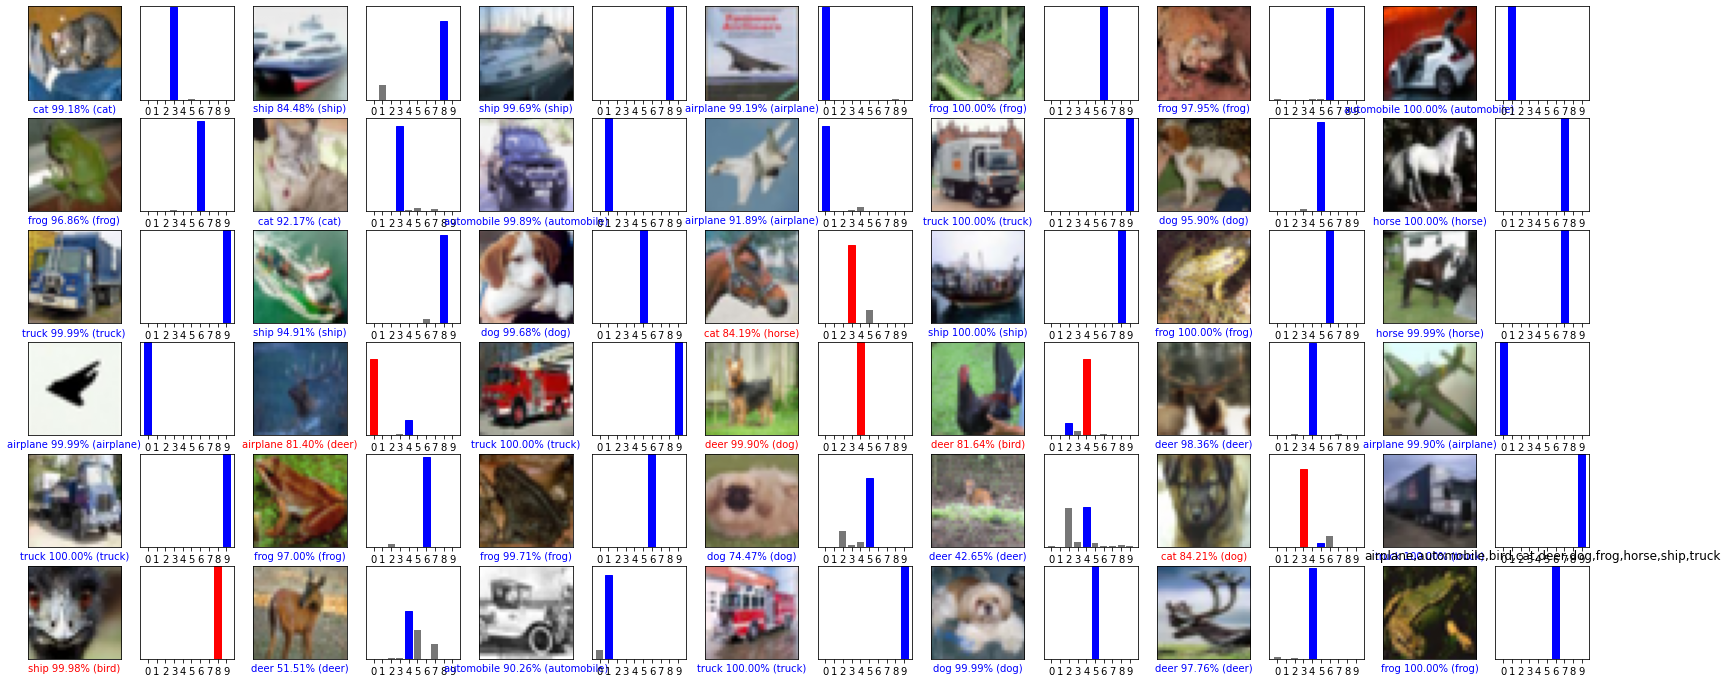

In [154]:
plt.figure(figsize=(2*2*num_col,2*num_row))
for i in range(num_row*num_col):
  plt.subplot(num_row,2*num_col ,2*i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_x[i])
  if np.argmax(predictions[i]) == np.max(test_y[i]):
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.2f}% ({})".format(class_names[np.argmax(predictions[i])],100*np.max(predictions[i]),class_names[np.max(test_y[i])]),color = color)

  plt.subplot(num_row,num_col*2,2*i+2)
  plt.xticks(range(10))
  plt.yticks([])
  plt.grid(False)
  plt.ylim([0,1])
  thisplot = plt.bar(range(10),predictions[i],color="#777777")
  # thisplot[np.max(test_y[i])] = 1
  thisplot[np.argmax(predictions[i])].set_color('red')
  thisplot[np.max(test_y[i])].set_color('blue')
plt.title('airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck')
plt.show()

In [0]:
print(test_y[11])
print(np.max(test_y[11]))